In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm


In [3]:
data = pd.read_csv('weight_height.csv')
data.head()


,Name,Weight,Height,Age
0,Alfred,69.0,112.5,14
1,Alice,56.5,84.0,13
2,Barbara,65.3,98.0,13
3,Carol,62.8,102.5,14
4,Henry,63.5,102.5,14


In [7]:
data.value_counts().sum()

19

In [8]:
data.isnull().sum()

Name      0
Weight    0
Height    0
Age       0
dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression

In [31]:
# So we are going to predict height with weight ...

Input = data[['Weight']].values
Output = data['Height'].values

model = LinearRegression(fit_intercept=True)
model.fit(Input, Output)

prediction = model.predict(Input)

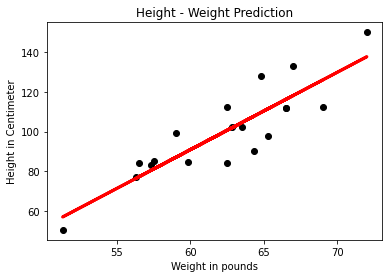

In [32]:
import matplotlib.pyplot as plt 

plt.scatter(Input, Output, color='black')
plt.plot(Input, prediction, color='red', linewidth=3)
plt.title("Height - Weight Prediction")
plt.xlabel('Weight in pounds')
plt.ylabel('Height in Centimeter')
plt.show()

# Mathematical Evaluation of model

In [33]:
# Coefficient

print(model.coef_)

[3.89903027]


In [34]:
# Intercept

print(model.intercept_)

-143.02691843935338


In [35]:
# R^2 

print(model.score(Input, Output))

0.7705068427159738


In [36]:
import math
from sklearn import metrics

# Root Mean Square 

print(math.sqrt(metrics.mean_squared_error(Output, prediction)))

10.618969430290756


# Statsmodel

In [38]:
x = data['Height']
y = data['Weight']

x2 = sm.add_constant(x)
ols = sm.OLS(y, x2)
result = ols.fit()

result.summary()

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     57.08
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           7.89e-07
Time:                        14:47:28   Log-Likelihood:                -43.519
No. Observations:                  19   AIC:                             91.04
Df Residuals:                      17   BIC:                             92.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5701      2.680     15.885      0.0

/Users/mahimairaja/opt/anaconda3/envs/dlearn/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
